# Understanding Winton Stock Market Data

* https://www.kaggle.com/c/the-winton-stock-market-challenge

과거 몇일전의 데이터를 받아서 몇일후에 주가를 예측하는 Challenge입니다.<br>
5일동안의 데이터를 받습니다. D-2, D-1, D, D+1, D+2 중에서 D-2, D-1, 그리고 D의 일부 시간 데이터를 받을뒤 남은 D, D+1, D+2의 주가를 예측하면 됩니다.<br>

D날에는 


<img src="images/winton-stock-data.png">

### **train.csv**
   * Feature_1 - Feature_25
   * Ret_MinusTwo, Ret_MinusOne
   * Ret_2 - Ret_120
   * Ret_121 - Ret_180: target variables
   * Ret_PlusOne, Ret_PlusTwo: target variables
   * Weight_Intraday, Weight_Daily
   
### **test.csv**
   * Feature_1 - Feature_25
   * Ret_MinusTwo, Ret_MinusOne
   * Ret_2 - Ret_120
   

### Data Fields



* **Feature_1 ~ Feature25:** prediction에 관련된 여러가지 features
* **Ret_MinusTwo:** D-2의 폐장시점부터 D1의 폐장시점까지의 수익률입니다. (1 day)
* **Ret_MinusOne:** D-1의 폐장시점부터 D의 일중 변동(Intraday returns)전까지의 수익률입니다. (대략 1/2 day)
* **Ret_2 ~ Ret_120:** D의 특정시점의 대략적인 분단위 수익률입니다. Ret_2의 경우 t=1 과 t=2사이의 수익률입니다.
* **Ret_121 ~ Ret_180:** D의 특정시점의 대략적인 분단위 수익률입니다. **target variables로서 {id}_{1~60}으로 예측을 해야하는 부분입니다**
* **Ret_PlusOne:** Ret_180이 계산 종료된 시점부터 D+1의 폐장시점까지의 수익률입니다. (대략 1 day). **target variables로서 {id}_61 로 예측을 해야 합니다.**
* **Ret_PlusTwo:** D+1의 폐장시점부터 D+2의 폐장시점까지의 수익률입니다. (1 day) **target variables로서 {id}_62로 예측을 해야 합니다.**
* **Weight_Intraday:** Ret_121 부터 Ret_180 까지의 일중 수익률을 계산시 사용한 가중치(weight)입니다.
* **Weight_Daily:**: Ret_PlusOne 그리고 Ret_PlusTwo를 예측할때 사용한 가중치 (Weight)입니다.

### Evaluation

* https://www.kaggle.com/c/the-winton-stock-market-challenge#evaluation

Winston Stock Market Challenge에서는 [Weighted Mean Absolute Error](https://www.kaggle.com/wiki/WeightedMeanAbsoluteError) 를 사용해서 평가를 합니다. 

$$ WMAE = \frac{1}{n}\sum\limits_{i=1}^{n} w_i \cdot \left|y_i - \hat{y_i}\right| $$

즉 여기서 $ w_i $는 Weight_Intraday 그리고 Weight_Daily 를 가르킵니다.

In [3]:
%pylab inline
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [4]:
train = pd.read_csv('/dataset/winton-stock-market-challenge/train.csv')
train[np.isnan(train)] = 0

In [45]:
representations = train[['Id', 'Feature_1', 'Feature_25', 
                         'Ret_MinusTwo', 'Ret_MinusOne', 
                         'Ret_2', 'Ret_180', 
                         'Ret_PlusOne', 'Ret_PlusTwo', 
                         'Weight_Intraday', 'Weight_Daily']]

representations.head()

,Id,Feature_1,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,0.0,0.000000,0.055275,-0.010770,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,0.0,-0.709462,0.009748,0.002987,-0.000487,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,0.0,-1.019370,0.003077,0.006181,-0.000782,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,0.0,0.000000,0.000984,0.014106,0.000277,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.0,3.219820,-0.018224,0.011065,-0.001232,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [46]:
representations.describe()

,Id,Feature_1,Feature_25,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,4.000000e+04
mean,20000.50000,0.600200,-0.324277,0.000784,-0.000803,0.000005,-0.000057,-0.000210,0.000012,1.504600e+06,1.880750e+06
std,11547.14972,1.761757,0.951699,0.028279,0.030569,0.000938,0.001270,0.025039,0.024160,2.059143e+05,2.573928e+05
min,1.00000,0.000000,-1.903876,-0.536283,-0.514720,-0.013118,-0.058046,-0.627690,-0.450779,1.000035e+06,1.250044e+06
25%,10000.75000,0.000000,-0.825369,-0.010687,-0.010830,-0.000309,-0.000413,-0.010521,-0.010055,1.357070e+06,1.696337e+06
50%,20000.50000,0.000000,-0.543432,0.000112,-0.000665,0.000000,-0.000002,-0.000258,-0.000258,1.477713e+06,1.847142e+06
75%,30000.25000,0.000000,-0.238619,0.010987,0.008976,0.000299,0.000364,0.010005,0.009772,1.624389e+06,2.030486e+06
max,40000.00000,10.000000,4.020332,0.894024,0.852139,0.032149,0.026112,0.795602,0.303038,2.761229e+06,3.451536e+06


## Feature Summary

In [52]:
features = train[[i for i in range(1, 26)]]
features.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.600200,-0.090678,0.541124,0.327286,5.482775,0.410145,49244.971525,0.194649,10.179650,2.435100,...,0.992000,-0.540847,0.791655,-1.169576,4.236800,0.590181,-0.747094,0.765620,-1.187342,-0.324277
std,1.761757,1.086873,0.893417,0.735459,2.942324,1.464542,28242.409717,0.139294,3.583524,2.451191,...,0.149788,0.931817,1.161032,0.665114,3.097332,1.305751,1.372765,1.270541,1.731339,0.951699
min,0.000000,-3.440521,-4.643526,-5.440596,1.000000,-0.936644,338.000000,0.000000,0.000000,0.000000,...,0.000000,-2.613987,-5.758047,-3.292909,0.000000,-1.514998,-5.819912,-7.221387,-11.442205,-1.903876
25%,0.000000,-0.791707,-0.092559,0.000000,2.000000,-0.250258,26143.000000,0.016600,8.000000,0.000000,...,1.000000,-1.012045,0.038021,-1.601557,2.000000,-0.279584,-1.746167,0.471171,-1.818760,-0.825369
50%,0.000000,0.000000,0.398252,0.159130,6.000000,0.014157,48457.000000,0.213800,10.000000,1.000000,...,1.000000,-0.585613,0.568230,-1.144071,4.000000,0.273658,-0.627180,0.926006,-0.842621,-0.543432
75%,0.000000,0.091542,1.037897,0.804371,8.000000,0.523780,72387.000000,0.331800,12.000000,5.000000,...,1.000000,-0.164687,1.305290,-0.691814,7.000000,1.086607,0.248467,1.392333,-0.082589,-0.238619
max,10.000000,4.175150,4.530405,2.953163,10.000000,12.609885,99861.000000,0.365000,36.000000,6.000000,...,2.000000,7.683857,6.352352,0.898236,10.000000,7.737020,2.284991,3.228906,2.526654,4.020332


In [25]:
features = train[[i for i in range(1, 26)]]
features.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25
0,0.0,0.000000,0.000000,0.000000,8.0,0.000000,75751,0.2254,11.0,0.0,...,1.0,0.000000,0.000000,-0.925463,2.0,0.000000,-0.489492,0.000000,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,3.0,0.388896,17369,0.0166,13.0,0.0,...,1.0,-0.949891,0.917958,-0.897067,9.0,0.886205,-0.151805,1.239856,0.953424,-0.709462
2,0.0,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,5.0,...,1.0,-1.132426,1.799813,-1.603488,3.0,0.000000,0.389061,1.728096,-1.798090,-1.019370
3,0.0,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,5.0,...,1.0,-1.131213,1.565036,0.000000,7.0,1.148738,-2.440799,1.551425,-1.788725,0.000000
4,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,4.0,...,1.0,6.317498,-3.208872,-1.102189,7.0,3.381040,1.732708,1.965189,-5.993092,3.219820


## Return Summary

In [47]:
returns = train[[26, 27, 28, 146, 147, 206, 207, 208]]
returns.describe()

,Ret_MinusTwo,Ret_MinusOne,Ret_2,Ret_120,Ret_121,Ret_180,Ret_PlusOne,Ret_PlusTwo
count,40000.000000,40000.000000,3.894600e+04,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000
mean,0.000784,-0.000803,5.600930e-06,-2.081735e-06,-3.539200e-05,-0.000057,-0.000210,0.000012
std,0.028279,0.030569,9.501528e-04,1.207381e-03,1.095917e-03,0.001270,0.025039,0.024160
min,-0.536283,-0.514720,-1.311777e-02,-2.844145e-02,-2.174075e-02,-0.058046,-0.627690,-0.450779
25%,-0.010687,-0.010830,-3.215495e-04,-3.465326e-04,-3.439227e-04,-0.000413,-0.010521,-0.010055
50%,0.000112,-0.000665,-1.989567e-07,-8.172886e-08,7.410876e-08,-0.000002,-0.000258,-0.000258
75%,0.010987,0.008976,3.122045e-04,3.437908e-04,3.389849e-04,0.000364,0.010005,0.009772
max,0.894024,0.852139,3.214902e-02,1.160767e-01,5.115931e-02,0.026112,0.795602,0.303038


## Training Intraday Returns

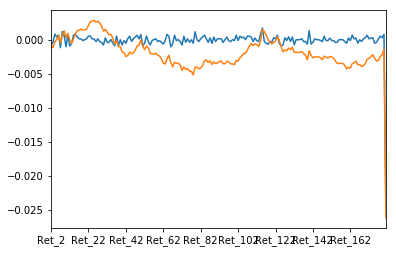

In [44]:
train_intraday = train[list(range(28, 208))]
idx = 2

plot(train_intraday.iloc[idx].as_matrix())
train_intraday.iloc[idx].cumsum().plot()
